<a href="https://colab.research.google.com/github/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/blob/main/RSG_RCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка английского датасета для сравнения

In [ ]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://dl.fbaipublicfiles.com/glue/superglue/data/v2/CB.zip" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/


Archive:  temp.zip
   creating: data/CB/
  inflating: data/CB/train.jsonl     
  inflating: data/CB/test.jsonl      
  inflating: data/CB/val.jsonl       



     0K .......... .......... .......... .......... .......... 67% 2.85M 0s
    50K .......... .......... ...                             100%  950K=0.04srm: cannot remove 'data/__MACOSX': No such file or directory


# Загрузка русскоязычного датасета

In [ ]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://russiansuperglue.com/tasks/download/RCB" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
   creating: data/RCB/
  inflating: data/RCB/train.jsonl    
   creating: data/__MACOSX/
   creating: data/__MACOSX/RCB/
  inflating: data/__MACOSX/RCB/._train.jsonl  
  inflating: data/RCB/.DS_Store      
  inflating: data/__MACOSX/RCB/._.DS_Store  
  inflating: data/RCB/test.jsonl     
  inflating: data/__MACOSX/RCB/._test.jsonl  
  inflating: data/RCB/val.jsonl      
  inflating: data/__MACOSX/RCB/._val.jsonl  
  inflating: data/__MACOSX/._RCB     



     0K .......... .......... .......... .......... .......... 37%  269K 0s
    50K .......... .......... .......... .......... .......... 74%  272K 0s
   100K .......... .......... .......... ...                  100%  164M=0.4srm: cannot remove 'sample_data/': No such file or directory


Fancy way to display content of the dataset directory

In [ ]:
%%bash
# add tree package for fancy directory display
apt-get install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (903 kB/s)
Selecting previously unselected package tree.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
# display the content of the folder
!tree

.
└── data
    └── RCB
        ├── test.jsonl
        ├── train.jsonl
        └── val.jsonl

2 directories, 3 files


# Загрузка в pandas

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

class JSONL_handler():
    """ opens a jsonl file and turns it into a necessary data structure """
    
    def __init__(self, path):
        self.path = path # path to jsonl file

    def to_pandas(self):
        """ get jsonl file content as a pandas DataFrame"""
        return pd.read_json(path_or_buf=self.path, lines=True)

In [ ]:
handler = JSONL_handler('data/RCB/train.jsonl')
df = handler.to_pandas()

[Pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf?platform=hootsuite) for reference


In [ ]:
handler_en = JSONL_handler('data/CB/train.jsonl')
df_en = handler_en.to_pandas()

# Общая информация про train

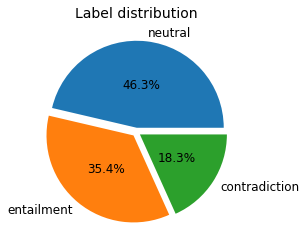

In [ ]:
import matplotlib.pyplot as plt
plt.title('Label distribution', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*3, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12))
plt.show()

In [ ]:
df['label'].value_counts()

neutral          203
entailment       155
contradiction     80
Name: label, dtype: int64

In [ ]:
df_en['label'].value_counts()

contradiction    119
entailment       115
neutral           16
Name: label, dtype: int64

По графикам ниже очень заметно, что распределения по классам очень разнятся. В английском датасете они сбалансированные, в то время как в RSG творится что-то странное

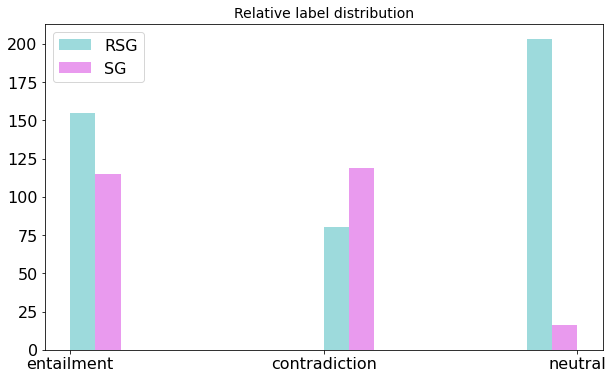

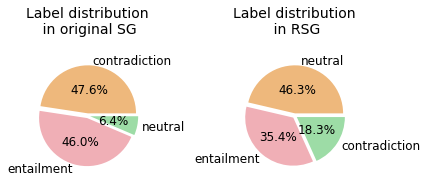

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Relative label distribution', fontsize=14)
plt.hist(x = [df['label'], df_en['label']], color=["#9ddadc", "#e99aee"], label=['RSG','SG'], rwidth = 50) 
plt.legend(loc='best')
plt.savefig('relative.png')
plt.show()
print()

plt.subplot(1,2,1)
colours = {'#9ddca6', '#f0afb6', '#eeb87c'}

plt.title('Label distribution\n in original SG\n', fontsize=14)
plt.pie(df_en['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*3, labels=df_en['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.subplot(1,2,2)

plt.title('Label distribution\n in RSG\n', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*3, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.tight_layout()
plt.show()

In [ ]:
df.head(6)

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
0,"Сумма ущерба составила одну тысячу рублей. Уточняется, что на место происшествия выехала следственная группа, которая установила личность злоумышленника. Им оказался местный житель, ранее судимый за подобное правонарушение.",entailment,Ранее местный житель совершал подобное правонарушение.,судить,no_negation,kp,0,NaN
1,"Перебрасываясь словечками, они скользят глазами по моему городу. Как они смеют смотреть, будто что-то понимают?",contradiction,Они что-то понимают,смотреть,no_negation,fiction,1,NaN
2,"— Разве что, — сказала она, — мы хотим где-нибудь выпить кофе. — Мне кажется, — сказал он, — что мы хотим. На следующей Он успел встать на эскалатор, когда понял, что это “Таганская”, а не “Тульская”.",neutral,"Это “ Таганская ”, а не “ Тульская ”.",понять,no_negation,fiction,2,NaN
3,"Зима, наконец, показала свой характер.",contradiction,У зимы есть свой характер.,показать,no_negation,kp,3,NaN
4,"ГуманностьБогаподобнымсценариемнепредполагается. Но Его благость остается в неприкосновенности. Непросто жить в таком мире, но кто сказал, что это должно быть просто?",contradiction,Это должно быть просто.,сказать,no_negation,fiction,4,NaN
5,"Для мамы праздник был как обычный день. Она кормила людей. Весеннее небо обещало счастье, но мать не верила ему.",neutral,Небо обещает счастье.,верить,negation,fiction,5,NaN


# Entailment

Очень часто есть полное повторение слов из premise. Мне кажется, что если написать такую эвристику, что у мы ищем полное совпадение всех слов из hypothesis за исключением отсуствия/наличия "не" и прочих слов-индикаторов, то может что-то и получится

In [ ]:
#примеры полного совпадения (здесь не все)
df.iloc[[12, 16, 20, 25, 29, 37, 46, 52, 59, 116]]

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
12,"Из материалов дела следует, что начальник одного из отделов пытался выбить субсидию заинтересованной организации за «откат».",entailment,Начальник одного из отделов пытался выбить субсидию заинтересованной организации за «откат».,следовать,no_negation,kp,12,NaN
16,"Мужчину задержали. В беседе с полицейскими он сознался, что купил наркотик у своего знакомого. Полицейские с поличным задержали подозреваемого.",entailment,Мужчина купил наркотик у своего знакомого.,сознаться,no_negation,kp,16,NaN
20,"Он отметил, что министерству культуры и руководителям учебных заведений будут направлены официальные приглашения на ""круглый стол"", который будет проведен на следующей неделе.",entailment,"Министерству культуры и руководителям учебных заведений направили официальные приглашения на ""круглый стол"".",отметить,no_negation,interfax,20,NaN
25,"""Задержанные доставлены в отдел полиции, где решается вопрос о привлечении их к административной ответственности"", - сказал собеседник агентства.",entailment,"Задержанные доставлены в отдел полиции, где решается вопрос о привлечении их к административной ответственности.",сказать,no_negation,interfax,25,NaN
29,"Нужно было понять героев сказки. Кто такие эти игрушки и зверушки, где коренится их сказочное обаяние, почему они вызывают у людей — в частности, у меня — ту любовь с первого взгляда, о которой я упоминал выше? И мне кажется, я кое-что понял.",entailment,Я кое-что понял.,казаться,no_negation,fiction,29,NaN
37,"Решение было принято комиссией по обеспечению безопасности дорожного движения при управе Центрального административного округа. Отмечается, что на данном участке дороги часто происходят аварии. Принятая мера должна повысить безопасность.",entailment,На данном участке дороги часто происходят аварии.,отметить,no_negation,kp,37,NaN
46,"Писатель с удивлением посмотрел на Пиара: – Я не знаю, почему вы так считаете, – сказал Писатель, чеканя каждое слово. – Хотя у вас свои основания для этого, мне, впрочем, совсем неизвестные. Но я считаю, что вы не правы и заблуждаетесь наравне со всеми.",entailment,Вы не правы и заблуждаетесь наравне со всеми.,считать,no_negation,fiction,46,NaN
52,"Он, герой, то и дело чешет шлем, как витязь на распутье. Либо убить пресловутую старушку, либо так и загнуться тварью дрожащей от недостатка средств. Автор и герой наперебой убеждают нас с вами, что третьего (ну, четвертого, пятого) не дано.",entailment,"Третьего ( ну, четвертого, пятого ) не дано.",убеждать,no_negation,fiction,52,NaN
59,"""В последнее время растет количество новых видов синтетических наркотиков как на нелегальном рынке сбыта наркотиков, так и на в сфере реализации лекарственных средств без рецепта"", - сказано в докладе.",entailment,"В последнее время растет количество новых видов синтетических наркотиков как на нелегальном рынке сбыта наркотиков, так и на в сфере реализации лекарственных средств без рецепта.",сказать,no_negation,interfax,59,NaN
116,"На место происшествия выехали сотрудники полиции и выяснили, что злоумышленники проникали в машины, разбивая стекла или вскрывая багажники. Ну а после брали все ценное, что находили. Подозреваемых вскоре задержали.",entailment,Злоумышленники проникали в машины через багажники и разбитые окна.,выяснить,no_negation,kp,116,NaN


In [ ]:
df_entailment = df[(df['label']== 'entailment')]
df_entailment.reset_index
df_entailment.iloc[40:50]

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
119,Только я вот что скажу — всяких там окрестных оборванцев я кормить не собираюсь.,entailment,Всяких там окрестных оборванцев я кормить не собираюсь.,сказать,no_negation,fiction,119,NaN
125,"""Я попросил их продолжать работу и не снижать темпов, крайне противно было"", — посетовал глава президентской администрации. ""Ну, терпел. Я не подавал виду, потому что я понимал, что если я начну подавать вид, это приведет к настороженности и попытке замести следы"", — добавил он.",entailment,"Если я начну подавать вид, это приведет к настороженности и попытке замести следы.",понимать,no_negation,interfax,125,NaN
128,"Молите Бога, мой друг, чтобы он помог мне вынести мое изгнание, которое здесь день ото дня кажется мне все более невыносимым. Эти два года кажутся мне веками. Я чувствую, что не смогу долго прожить так, как живу теперь.",entailment,"Я не смогу долго прожить так, как живу теперь.",чувствовать,no_negation,fiction,128,NaN
129,"Мужчину подозревают в убийстве двоих человек, с которыми он ремонтировал здание городского пенсионного фонда, что на улице Красноармейской.",entailment,"Мужчина убил двоих человек, с которыми он ремонтировал здание городского пенсионного фонда, что на улице Красноармейской.",подозревать,no_negation,kp,129,NaN
135,"""Недопустимо, когда у нас деньги есть, а с договорами творится такой бардак. В следующем году этому место быть не должно"", - сказал он. ""Я сейчас не говорю о том, кто конкретно в чем виноват.",entailment,Кто-то конкретно в чем-то виноват.,говорить,negation,interfax,135,NaN
136,Я смеюсь. - Вступил! - вызывающе говорит он.,entailment,Он вступил.,говорить,no_negation,fiction,136,NaN
137,"Ярославские следователи просят жителей области помочь найти мужчину, подозреваемого в причинении смерти по неосторожности.",entailment,"Ярославские следователи не могут найти мужчину, подозреваемого в причинении смерти по неосторожности.",просить,no_negation,kp,137,NaN
140,"Готовность станций в настоящее время достаточно высокая, - сказал он.",entailment,Готовность станций достаточно высокая.,сказать,no_negation,interfax,140,NaN
145,"Когда он вернулся с прогулки, обратил внимание на то, что часть парковки возле гостиницы огорожена красной лентой, однако ни предупреждающих знаков, ни информационных табличек в зоне видимости не было. Припарковав автомобиль в метре от ограждения, мужчина отправился в свой номер. Около восьми часов утра турист услышал звук сработавшей сигнализации.",entailment,Сигнализация сработала.,услышать,no_negation,kp,145,NaN
146,"Тягуче проскрипела дверь. Мы оглянулись, я увидел просунувшуюся голову кузнеца. Он сказал: — Готово!",entailment,— Готово!,сказать,no_negation,fiction,146,NaN


In [ ]:
#случаи неправильной разметки: должно быть neutral
df.iloc[[35, 63, 70, 102, 112]]

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
35,"У мужиков спрашивают, те тоже — не знаем, не ведаем. Чертовщина какая-то!.. Решили у склада сторожа поставить.",entailment,У склада поставили сторожа.,решить,no_negation,fiction,35,NaN
63,"Мы по-прежнему исходим из того, что был факт нарушения закона. Раз правонарушение было, соответственно виновные должны понести наказание. Речь Мадонны, ее призыв поддержать гомосексуальное сообщество, дают понять, что гомосексуализм это хорошо.",entailment,Был факт нарушения закона.,исходить,no_negation,interfax,63,NaN
70,"Он не мог понять, как он сам не догадался сделать это в свое время. Как теперь оказался на окраине любых мыслей, как он стал наблюдателем, ничтожнейшим из наблюдателей — бесцельным. Он всегда чувствовал себя каким-то отдельным существом, не человеком, а только учеником людей.",contradiction,Он сделал это в свое время.,догадаться,negation,fiction,70,NaN
102,"Извини. — Бог с ней, с кофточкой. Ты говорил, что хочешь меня видеть.",entailment,Ты хочешь меня видеть.,говорить,no_negation,fiction,102,NaN
112,"Пообщался с жителями. И выяснил, что большинство из них даже не знают, кто их участковый, – сказал глава региона. - А потому предлагаю подумать над вопросом размещения на подъездах домов информационных щитов с телефонами различных экстренных служб, а также контактными данными близлежащих отделов полиции и участковых.",entailment,"На подъездах домов разместят информационные щиты с телефонами различных экстренных служб, а также контактными данными близлежащих отделов полиции и участковых.",предложить подумать,no_negation,kp,112,NaN


In [ ]:
#случаи странной разметки (наверное, тоже стоит в neutral)
#146 вообще очень странное
df.iloc[[36, 39, 65, 108, 146]]

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
36,"Он не мог понять, как он сам не догадался сделать это в свое время. Как теперь оказался на окраине любых мыслей, как он стал наблюдателем, ничтожнейшим из наблюдателей — бесцельным. Он всегда чувствовал себя каким-то отдельным существом, не человеком, а только учеником людей.",entailment,"Он какое-то отдельное существо, не человек, а только ученик людей.",чувствовать,NaN,fiction,36,no_negation
39,"Весело если — смейся, Если печально — плачь. Но сразу то и другое — Мой не осилит дух. Думаю о покое, Где правит одно из двух.",entailment,"Есть покой, где правит одно из двух.",думать,no_negation,fiction,39,NaN
65,"Изменила ли она что-то в нашей душе? Вряд ли. Мы твердим “Нравится, не нравится”, а по сути равнодушны, и те же художники это чувствуют.",entailment,Мы по сути равнодушны.,чувствовать,no_negation,fiction,65,NaN
108,"После того, как в этих местах построили маленький винный завод, населенный пункт “повысили” в статусе – деревня стала городом. Не исключено, что по такому случаю на одной из улиц были высажены тополя. С того момента в городке ее считали центральной.",entailment,Это центральная улица.,считать,no_negation,fiction,108,NaN
146,"Тягуче проскрипела дверь. Мы оглянулись, я увидел просунувшуюся голову кузнеца. Он сказал: — Готово!",entailment,— Готово!,сказать,no_negation,fiction,146,NaN


# Contradiction

Выражения, которые могут служить индикаторами лэйбла contradiction: будто, ?, вдруг, вопрос, подозрева(е|ю)т, требовал, показал(а|и)сь, кажется/казаться, хотим, не, возможно, смеешь, хотя, разве, предполагал(а)?, думае(шь|те), считали, подумали, обман(ываться)*, нужно, а, заблуждаться, но 

In [ ]:
df_contr = df[(df['label']== 'contradiction')]
df_contr.reset_index
df_contr.head()

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
1,"Перебрасываясь словечками, они скользят глазами по моему городу. Как они смеют смотреть, будто что-то понимают?",contradiction,Они что-то понимают,смотреть,no_negation,fiction,1,NaN
3,"Зима, наконец, показала свой характер.",contradiction,У зимы есть свой характер.,показать,no_negation,kp,3,NaN
4,"ГуманностьБогаподобнымсценариемнепредполагается. Но Его благость остается в неприкосновенности. Непросто жить в таком мире, но кто сказал, что это должно быть просто?",contradiction,Это должно быть просто.,сказать,no_negation,fiction,4,NaN
9,"Обеспокоилась судьбой серебряных ложек, которые лежали у рабочих, как говорится, на виду. Вдруг украдут! Стала убирать. В ответ мама со словами: “Да как ты смеешь так думать, дрянь! Это же РАБОЧИЕ, понимаешь, РАБОЧИЕ!!",contradiction,Рабочие украдут ложки.,думать,no_negation,fiction,9,NaN
14,Вопрос качества работы орловских библиотек на днях обсудили в Правительстве Орловской области.,contradiction,Орловские библиотеки работают качественно.,обсудить,no_negation,kp,14,NaN


Странные сегменты 162, 164

Не понятно, как рассматривать метафоры.
Сегменты 181, 186, 223, 337, 425 амбивалентны. Они одновременно и подходят, и не подходят к тексту.

In [ ]:
#272, 280, 290, 303, 442 - возможно все же не contradiction
df.iloc[[27, 34, 66, 67, 68, 105, 138, 139, 187, 236, 243, 273, 302, 395]]

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
27,"Не гневается на тех, кто, не останавливаясь, проходит мимо. Но сам он остро, пронзительно сострадает несчастному. И — заставляет задуматься, осознать, как хрупка и уязвима наша душа, как неповторимо единственна человеческая жизнь.",contradiction,"Хрупка и уязвима наша душа, неповторимо единственна человеческая жизнь.",осознать,no_negation,fiction,27,NaN
34,"Как я матерюсь, так она врет. Ловлена с поличным неоднократно, принципов своих не предавала, продолжала врать и обижаться, что ей не верят. Свято помня отцовский завет “Наказывают не за преступление, а за то, что попался”, никогда ни в чем не признается.",contradiction,Ей не верят.,обижаться,no_negation,fiction,34,NaN
66,"Тогда как собственная смерть не значит ничего. И вы благодарны вашему убийце за то, что он не брезгует подойти вплотную. Все так изложено - я бы сказал, даже чересчур ясно.",contradiction,Это изложено даже чересчур ясно.,сказать,no_negation,fiction,66,NaN
67,"Все вернулось на круги своя. Но во мне многое изменилось. Теперь я спокойно, даже отстраненно оглядывалась на себя прежнюю и не понимала, зачем так долго обманывала себя.",contradiction,Я долго обманывала себя.,понимать,negation,fiction,67,NaN
68,"Но этого хватило, чтобы скульптура получилась внушительного размера. Длина палубы крейсера - шесть метров. Не забыли и раскрасить для большего сходства с оригиналом.",contradiction,Скульптура была раскрашена.,забыть,negation,kp,68,NaN
105,Настоящий друг. Выручил меня с оркестром. Не забуду.,contradiction,Друг меня выручил.,забыть,negation,fiction,105,NaN
138,"Воспитывать, дорогие мои, надо на подвиге, на героизме. А этого бы хоть подстригли. Слышите, товарищ, я вам говорю, как там ваша фамилия,— неприлично мужчине ходить с такими волосами.",contradiction,Неприлично мужчине ходить с такими волосами.,говорить,no_negation,fiction,138,NaN
139,Дополнительные меры безопасности будут приняты на время новогодних и рождественских праздников.,contradiction,Во время новогодних и рождественских праздников будет безопаснее.,принять,no_negation,kp,139,NaN
187,"Мужчина пытался сбежать с места и даже кинулся на сотрудников полиции с желанием помахать кулаками. Агрессивного нарушителя скрутили, посадили в машину и отвезли в ближайший участок. Проверка на трезвость показала, что водитель был в состоянии алкогольного опьянения.",contradiction,Водитель был в состоянии алкогольного опьянения.,показать,no_negation,kp,187,NaN
236,"Наконец раздался голос. Мужской и смутно знакомый. Голос, запинаясь, медленно, как бы сомневаясь, что его услышат и поймут, произносил: – Добрый день.",contradiction,Его услышат.,сомневаться,no_negation,fiction,236,NaN


# Neutral

В английском варианте neutral значительно меньше и к ним обычно относят сегменты, на которые нельзя дать однозначный ответ. То есть они вроде связаны с текстом, но не понятно как именно. Примеры можно увидеть ниже. Как мне кажется, в RSG сюда должны относиться как раз метафоры. Также сюда обычно относятся вопросы и как раз модальность со значением неуверенности, типа "надеюсь", "предполагается", которая в русской версии очень часто встречается в contradiction.

In [ ]:
df_neutral_en = df_en[(df_en['label']== 'neutral')]
df_neutral_en.reset_index
df_neutral_en.head()

,premise,hypothesis,label,idx
33,``I hope you are settling down and the cat is well.'' This was a lie. She did not hope the cat was well.,the cat was well,neutral,33
67,"It is all very well, in these changing times, to adapt one's work to take in duties not traditionally within one's realm. But bantering is of another dimension altogether. For one thing how would one know for sure that at any given moment a response of the bantering sort is truly what is expected?",at any given moment a response of the bantering sort is truly what is expected,neutral,67
76,``Clever''. Klug means ``clever''. Would you say that Abie was clever?,Abie was clever,neutral,76
84,"Nicky approached her with the assumption that men are naturally right and it is the role of women to follow their lead. Constance, whose confidence was growing daily, was not prepared to give in to Nicky's wishes merely because of his sex. If she felt he was right then she agreed with him.",Nicky was right,neutral,84
86,I can't afford to get bogged down in the weeds. But at least you know she did leave. Maybe a coincidence maybe the two girls talked on the phone decided they 'd both had enough.,the two girls had both had enough,neutral,86


In [ ]:
df_neutral = df[(df['label']== 'neutral')]
df_neutral.reset_index
df_neutral.iloc[40:50]

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
92,"Экспертный совет этим был удовлетворен, а руководство федерации считает, что радоваться рано.",neutral,Радоваться рано.,считать,no_negation,interfax,92,NaN
93,"– Ты рад, что тебя сюда привезли? – спросила она. – Да... потому, что я с вами познакомился, – сказал я и вдруг понял, что не солгал.",neutral,Тебя сюда привезли.,радоваться,no_negation,fiction,93,NaN
94,"И в этом состоит главный результат саммита. Никакого геополитического поворота не произошло. Убежден, уже и не произойдет.",neutral,Никакого геополитического поворота уже и не произойдет.,убедить,no_negation,interfax,94,NaN
95,"Он толкнул жену, чтобы не было больше соблазна денег. Вот такое допущение сделал старик. Он был уверен, что так все и было, только доказать не мог.",neutral,Так все и было.,"уверять,доказать",no_negation,fiction,95,NaN
99,"Как я матерюсь, так она врет. Ловлена с поличным неоднократно, принципов своих не предавала, продолжала врать и обижаться, что ей не верят. Свято помня отцовский завет “Наказывают не за преступление, а за то, что попался”, никогда ни в чем не признается.",neutral,"Наказывают не за преступление, а за то, что попался.",помнить,no_negation,fiction,99,NaN
100,"Реакция последовала оглушительная. Тренер рухнул на одно колено, так что чуть не перевернул ринг, и согнулся, держась за правый бок. – Ух ты, – сказал тренер, тяжело дыша, – ух ты, ух ты.",neutral,Тренер был восхищен.,сказать,no_negation,fiction,100,NaN
101,"В ходе досмотра у злоумышленника изъяли орудие преступления. Его причастность к разбою подтвердили следы пальцев рук, изъятые криминалистами с дверной ручки при осмотре места происшествия. Задержанный свою вину полностью признал.",neutral,Злоумышленник причастен к разбою.,подтвердить,no_negation,kp,101,NaN
103,Сказал: выслушайте меня. Сказал: я люблю тебя. Сказал: мне не жить вдали от тебя... Она рассмеялась.,neutral,Мне не жить вдали от тебя.,сказать,no_negation,fiction,103,NaN
104,"Они ж были довольны и уже хвалили нас, кинувшихся в порыве общем докладывать про тех иностранцев всякие разности: прорвался мой голос выше других, и я успел выпалить, что жвачки, которые они мне давали, даже не раскрывал, а сразу выбрасывал, и живо было чувство, что очистился душой. После нас допросили о тех, кто отнимает монетки. Просили указать внешность этих людей.",neutral,"Жвачки, которые они мне давали, даже не раскрывал, а сразу выбрасывал.",выпалить,no_negation,fiction,104,NaN
111,"За происходящим наблюдал очень толстый мужчина. Я заметил в его глазах ревность. Мне показалось, что это был местный спортивный босс.",neutral,Это был местный спортивный босс.,показаться,no_negation,fiction,111,NaN


In [ ]:
#сегменты, которые скорее entailment
df.iloc[[2, 21, 24, 31, 33, 45, 53, 54, 61, 72]]

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
2,"— Разве что, — сказала она, — мы хотим где-нибудь выпить кофе. — Мне кажется, — сказал он, — что мы хотим. На следующей Он успел встать на эскалатор, когда понял, что это “Таганская”, а не “Тульская”.",neutral,"Это “ Таганская ”, а не “ Тульская ”.",понять,no_negation,fiction,2,NaN
21,"Сумма ущерба составила одну тысячу рублей. Уточняется, что на место происшествия выехала следственная группа, которая установила личность злоумышленника. Им оказался местный житель, ранее судимый за подобное правонарушение.",neutral,На место происшествия выехала следственная группа.,уточняться,no_negation,kp,21,NaN
24,"Тогда злоумышленник впал в ярость. Схватив нож и приставив лезвие к шее жертвы, он все же заставил мать принести деньги из комнаты бабушки. На основании доказательств, представленных районной прокуратурой, суд признал мужчину виновным в разбое с применением предмета, использованного в качестве оружия, и приговорил к четырем годам колонии общего режима.",neutral,"Мужчина был виновен в разбое с применением предмета, использованного в качестве оружия.",признать,no_negation,kp,24,NaN
31,"Чтобы узнать, о чем жизнь, надо ее прожить. Но прожить жизнь, это значит – умереть. И я тогда начинал думать о том, что когда все люди одинаково верили в Бога, все были разными, когда же все по-разному и в индивидуальном порядке в Боге разуверились, все стали одинаковыми.",neutral,"Когда все по-разному и в индивидуальном порядке в Боге разуверились, все стали одинаковыми.",думать,no_negation,fiction,31,NaN
33,"Глава государства также считает, что такое строительство позволит загрузить отечественную металлургию.",neutral,такое строительство позволит загрузить отечественную металлургию.,считать,no_negation,interfax,33,NaN
45,"Прямо как мы! (Заметим, в скобках, что структура анекдота похожа на нашу серию “русский, немец и поляк”.) Надо сказать, что корейцы пьют не только чай.",neutral,Корейцы пьют не только чай.,сказать,no_negation,fiction,45,NaN
53,"Это как в живописи: вся ответственность только на художнике. Вспомни, когда приступаешь к работе, то долго ищешь натуру — все не то, не то, — а потом вдруг — раз, нашел! С первого взгляда понимаешь, с первого взгляда чувствуешь.",neutral,"Когда приступаешь к работе, то долго ищешь натуру.",вспомнить,no_negation,fiction,53,NaN
54,"- Муниципальные службы проводили профилактическую обрезку деревьев, но у продовольственного магазина совершенно здоровые на вид деревья решили спилить.",neutral,Муниципальные службы спилили деревья у продовольственного магазина.,решить,no_negation,kp,54,NaN
61,"— Но так же не бывает! — терпеливо разъяснял он мне. — Понимаешь, обман получается.",neutral,Обман получается.,понимать,no_negation,fiction,61,NaN
72,"Я приходил к ним и говорил: вот, есть такая программа, я готов ее вести. У меня неограниченное количество российских денег. Готовы вы принять участие в этой программе?",neutral,Я готов вести программу,говорить,no_negation,fiction,72,NaN


In [ ]:
#сегменты, которые скорее contradiction
df.iloc[[26, 38, 49, 71, 73]]

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
26,"- Насколько вы удовлетворены результатами сезона? Все ли намеченное удалось сделать? - Экспертный совет уже подвел итоги и нас поблагодарил, но говорить об удовлетворении не приходится.",neutral,Они говорят об удовлетворении.,приходиться,no_negation,interfax,26,NaN
38,"Даже если таковой найдется среди нас, здесь, то я все равно не поверю, что он этого не понимает. Это, как говорится, прописные истины, и потому все мы это прекрасно понимаем. Если говорить о себе лично, то я почему-то почти уверен, что все мы по этому поводу думаем одинаково, — иначе я просто засомневался бы, есть ли в этом мире хоть что-нибудь такое, что мы в нем понимаем.",neutral,Все мы по этому поводу думаем одинаково.,уверять,no_negation,fiction,38,NaN
49,"— Между тем одного адского шума, по забавному совпадению именуемого роком, достаточно, чтобы поставить точку. И не только в том, что касается музыки. Как вы думаете, почему африканцы так отстали в развитии от европейцев и азиатов?",neutral,Африканцы отстали в развитии от европейцев и азиатов.,думать,no_negation,fiction,49,NaN
71,"Как бы там ни было в таких случаях на самом деле покупатель имеет право обратиться с претензией к торговой сети или к производителю хлеба. Они обязаны поменять булку на качественную либо вернуть деньги. Если покупатель считает, что такая «начинка» нанесла вред его психике или здоровью, он также может потребовать материальную компенсацию.",neutral,Такая «начинка» нанесла вред психике или здоровью покупателя.,считать,no_negation,kp,71,NaN
73,"— Если бы у меня был мел, я бы разрисовал им парадное, — сказал я, — первый раз вижу не разрисованное мелом парадное.",neutral,Первый раз парадное не разрисовано мелом.,видеть,no_negation,fiction,73,NaN


In [ ]:
#спорные сегменты
df.iloc[[8, 10, 30, 44, 56]]

,premise,label,hypothesis,verb,negation,genre,idx,no_negation
8,"По обратному эскалатору он уже бежал, навстречу с только что приехавшего поезда шла плотная толпа, он суетливо лавировал, наступал на чьи-то возмущенные ноги, но поезд успел уйти. Было начало седьмого, если бы даже он оказался на “Тульской” прямо сию секунду, он бы все равно гарантированно опоздал. “Можно на все плюнуть, — подумал он, лихорадочно подсчитывая минуты.",neutral,Можно на все плюнуть.,подумать,no_negation,fiction,8,NaN
10,"— Пойдём пообедаем. Я с утра ничего не ел. Отель, как видишь, весьма посредственный, но мне сказали, что в здешнем ресторане отлично готовят.",neutral,В здешнем ресторане отлично готовят.,сказать,no_negation,fiction,10,NaN
30,На заседании совета Общественной палаты обсудили целесообразность организации в городе платных парковок.,neutral,В городе целесообразно организовать платные парковки.,обсудить,no_negation,kp,30,NaN
44,"Само собой, я на ней гораздо моложе и симпатичней. Понимаешь, хотелось предстать в лучшем виде, ну я и выбрал самую удачную фотографию из своего... арсенала. Надеюсь, ты не очень разочарована при виде реального меня.",neutral,Ты не очень разочарована при виде реального меня.,надеяться,no_negation,fiction,44,NaN
56,"— Подожди, — говорю, — положим, я скажу? Он же поймет, что ты наврала!",neutral,Ты наврала.,понять,no_negation,fiction,56,NaN


# Hypothesis only

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.DataFrame({'hypothesis': df.hypothesis, 'label': df.label})
data["label"].replace({"neutral": 0, "contradiction": 0, 'entailment': 1}, inplace=True)

In [ ]:
train, test = train_test_split(data, test_size = 0.2, random_state=21)

In [ ]:
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, analyzer ='char', ngram_range = (5, 5))
X_train = vectorizer.fit_transform(train.hypothesis)
X_test = vectorizer.transform(test.hypothesis)

In [ ]:
y_train = train.label.values
y_test = test.label.values

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda.fit(X_train_da, y_train)
y_pred = lda.predict(X_test_da)

# Compute and print metrics
print("Accuracy: {}".format(lda.score(X_test_da, y_test)))
print(classification_report(y_test, y_pred))
print("F1: {}".format(f1_score(y_test, y_pred)))

Accuracy: 0.6818181818181818
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        57
           1       0.64      0.23      0.33        31

    accuracy                           0.68        88
   macro avg       0.66      0.58      0.56        88
weighted avg       0.67      0.68      0.63        88

F1: 0.3333333333333333


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(reg_param = 0.01)

qda.fit(X_train_da, y_train)
y_pred = qda.predict(X_test_da)

# Compute and print metrics
print("Accuracy: {}".format(qda.score(X_test_da, y_test)))
print(classification_report(y_test, y_pred))
print("F1: {}".format(f1_score(y_test, y_pred)))

Accuracy: 0.6590909090909091
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        57
           1       0.52      0.48      0.50        31

    accuracy                           0.66        88
   macro avg       0.62      0.62      0.62        88
weighted avg       0.65      0.66      0.66        88

F1: 0.5000000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Frequency experiments

In [ ]:
!pip install pymorphy2 

     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 8.2MB 4.0MB/s 


In [ ]:
import pymorphy2
import re
from pymorphy2 import MorphAnalyzer
from functools import lru_cache
import nltk
m = MorphAnalyzer()
from collections import Counter

rg = re.compile("[А-Яа-яA-z]+")

def words_only(text, rg=rg):
    try:
        return rg.findall(text.lower())
    except:
        return []

@lru_cache(maxsize=128)
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)  
    return lemmas

def freq_dist(frame):
  words = frame.values.tolist()
  flatList = [item for elem in words for item in elem]
  freq = Counter()
  for x in flatList:
    freq.update(x)
  return freq

In [ ]:
new_words = []
for i in range(len(df.premise)):
    new_words.append(clean_text(df.premise[i]))

In [ ]:
df_freq = pd.DataFrame({'new': new_words, 'label': df.label})
df_freq_ent = df_freq[(df_freq['label']== 'entailment')].drop('label', axis = 1)
df_freq_cont = df_freq[(df_freq['label']== 'contradiction')].drop('label', axis = 1)
df_freq_non = df_freq[(df_freq['label']!= 'contradiction')].drop('label', axis = 1)   

In [ ]:
ent_count = freq_dist(df_freq_ent)
non_ent_count = freq_dist(df_freq_non)

a = set(freq_dist(df_freq_ent).keys())
b = set(freq_dist(df_freq_non).keys())

In [ ]:
#для лэйбла entailment нет таких слов, которых не было бы в других лэйблах
left = []
right = []
non_ent = {}
for x in (b-a):
  non_ent[x] = non_ent_count[x]
for w in sorted(non_ent, key=non_ent.get, reverse=True):
  left.append(w)
  right.append(non_ent[w])

n_e = pd.DataFrame({'word': left, 'right': right})

In [ ]:
n_e.head(20)

,word,right
0,ничего,11
1,писать,6
2,обман,6
3,вс,5
4,уверить,5
5,оно,5
6,искусство,5
7,важный,4
8,заметить,4
9,перевести,4


In [ ]:
word = []
count_plus = []
count_minus = []
for x in (a&b):
  if ent_count[x] < non_ent_count[x] and (non_ent_count[x]-ent_count[x]) > 10:
    word.append(x)
    count_plus.append(ent_count[x])
    count_minus.append(non_ent_count[x])

n_e_union = pd.DataFrame({'word': word, 'ent': count_plus, 'non_ent': count_minus})

In [ ]:
n_e_union['std'] = n_e_union.non_ent - n_e_union.ent
n = n_e_union.sort_values(by=['std'], ascending=False)
n.head(10)

,word,ent,non_ent,std
58,и,114,289,175
9,в,121,291,170
41,что,110,278,168
8,я,87,243,156
4,он,90,230,140
26,не,98,231,133
32,быть,41,113,72
63,на,56,128,72
47,она,27,93,66
3,с,50,113,63
